In [1]:
!pip install jupyter_contrib_nbextensions
import os
os.system("jupyter contrib nbextension install --user")


1

# Linear Regression in Machine Learning

## Overview
Linear regression is used to model the relationship between a dependent (target) variable and one or more independent (predictor) variables by fitting a linear equation to observed data. It's one of the simplest and most interpretable forms of machine learning.

## Types of Linear Regression
1. **Simple Linear Regression:** Involves one independent variable.
2. **Multiple Linear Regression:** Involves more than one independent variable.

## Mathematical Formulation
- **Simple Linear Regression:**
  

\[
  y = \beta_0 + \beta_1 x + \epsilon
  \]


  where:
  - \( y \) is the dependent variable.
  - \( x \) is the independent variable.
  - \( \beta_0 \) is the y-intercept.
  - \( \beta_1 \) is the slope of the line.
  - \( \epsilon \) is the error term.

- **Multiple Linear Regression:**
  

\[
  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon
  \]


  where:
  - \( x_1, x_2, ..., x_n \) are the independent variables.
  - \( \beta_1, \beta_2, ..., \beta_n \) are the coefficients.

## Steps in Linear Regression
1. **Collect Data:** Gather data with dependent and independent variables.
2. **Preprocess Data:** Clean and prepare the data (e.g., handling missing values, encoding categorical variables).
3. **Split Data:** Divide the dataset into training and testing sets.
4. **Fit the Model:** Use the training data to fit the linear regression model.
5. **Evaluate the Model:** Use the testing data to evaluate the model's performance.
6. **Make Predictions:** Use the model to make predictions on new data.

## Model Fitting
To fit a linear regression model, we need to estimate the coefficients \( \beta_0, \beta_1, ..., \beta_n \) that minimize the residual sum of squares (RSS):


\[
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]


where \( \hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_n x_{in} \) is the predicted value.

## Gradient Descent
One way to find the optimal coefficients is through the gradient descent algorithm, which iteratively updates the coefficients to minimize the cost function (RSS):


\[
\beta_j = \beta_j - \alpha \frac{\partial}{\partial \beta_j} J(\beta)
\]


where \( \alpha \) is the learning rate and \( J(\beta) \) is the cost function.

## Evaluation Metrics
- **R-squared (R²):** Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Ranges from 0 to 1 (higher is better).
- **Mean Squared Error (MSE):** The average of the squared differences between the predicted and actual values.
- **Root Mean Squared Error (RMSE):** The square root of MSE, providing a measure in the same units as the target variable.

## Example: Predicting House Prices
Let's go through an example using a simple dataset where we want to predict house prices based on their sizes.

### Data
| House Size (sq ft) | Price ($) |
|--------------------|-----------|
| 1500               | 300,000   |
| 2000               | 400,000   |
| 2500               | 500,000   |
| 3000               | 600,000   |

### Step-by-Step Process
1. **Fit the Model:**
   

\[
   \text{Price} = \beta_0 + \beta_1 \times \text{House Size}
   \]


2. **Calculate Coefficients:**
   Using gradient descent or another optimization method, we find:
   

\[
   \beta_0 = 50,000, \quad \beta_1 = 200
   \]


3. **Model Interpretation:**
   - **Intercept (\(\beta_0\)):** The baseline price is $50,000 when the house size is zero (though this might not make practical sense, it’s a mathematical interpretation).
   - **Slope (\(\beta_1\)):** For every additional square foot, the house price increases by $200.

4. **Make Predictions:**
   For a house with a size of 2700 sq ft:
   

\[
   \text{Predicted Price} = 50,000 + 200 \times 2700 = 590,000
   \]



## Advantages and Disadvantages
- **Advantages:**
  - Simple to implement and interpret.
  - Fast to train and make predictions.
  - Works well for linear relationships.

- **Disadvantages:**
  - Assumes a linear relationship between the variables.
  - Sensitive to outliers.
  - May not perform well with complex, non-linear relationships.

Linear Regression is a powerful starting point in the world of machine learning, and understanding it provides a solid foundation for exploring more advanced algorithms. If you have any specific questions or need further details, feel free to ask!


<hr/>

## Problem: Predicting house prices based on their sizes

Solution
Step 1: Collecting Data
Let's create a simple dataset with house sizes and corresponding prices.

In [2]:
import pandas as pd

# Creating the dataset
data = {
    'Size': [1500, 2000, 2500, 3000, 3500],
    'Price': [300000, 400000, 500000, 600000, 700000]
}
df = pd.DataFrame(data)
print(df)


   Size   Price
0  1500  300000
1  2000  400000
2  2500  500000
3  3000  600000
4  3500  700000


Step 2: Preprocessing Data
Check for missing values and preprocess if necessary, ensure the data is clean and ready for modeling.

In [3]:
# Check for missing values
print(df.isnull().sum())

# No missing values in this simple dataset


Size     0
Price    0
dtype: int64


Step 3: Splitting Data
We'll split the data into training and testing sets.

In [4]:
!pip install scikit-learn

from sklearn.model_selection import train_test_split

# Splitting the data with a smaller test size
X = df[['Size']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


Step 4: Fitting the Model
We'll fit a linear regression model to the training data.

In [5]:
from sklearn.linear_model import LinearRegression

# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)


LinearRegression()

Step 5: Evaluating the Model
We'll evaluate the model using R-squared and Mean Squared Error.

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions
y_pred = model.predict(X_test)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


R-squared: 1.0
Mean Squared Error: 6.776263578034403e-21


Step 6: Making Predictions
We'll use the model to predict the price of a house with a given size.

In [7]:
# Predicting the price of a house with size 2700 sq ft
new_size = pd.DataFrame({'Size': [2700]})
predicted_price = model.predict(new_size)
print(f'Predicted Price for 2700 sq ft: {predicted_price[0]}')


Predicted Price for 2700 sq ft: 540000.0


Scatter Plot with Regression Line:

Scatter Plot: Shows the actual house sizes and their corresponding prices.

Regression Line: The fitted line from our linear regression model.

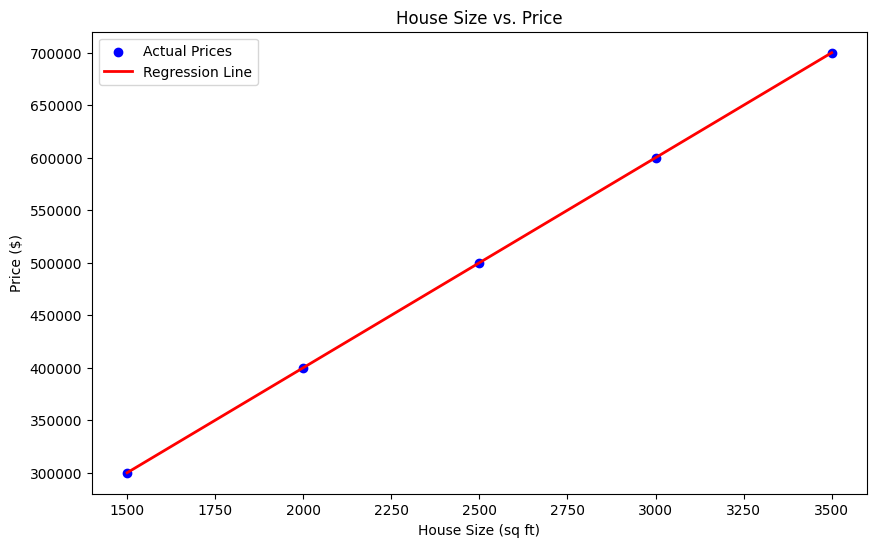

In [8]:
!pip install matplotlib

import matplotlib.pyplot as plt

# Plotting the scatter plot with the regression line 
plt.figure(figsize=(10, 6)) 
plt.scatter(X, y, color='blue', label='Actual Prices') 
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line') 
plt.xlabel('House Size (sq ft)') 
plt.ylabel('Price ($)') 
plt.title('House Size vs. Price') 
plt.legend() 
plt.show()

Residual Plot:

Residuals: The difference between the actual and predicted prices.

Horizontal Line: A reference line at zero to help visualize the distribution of residuals.

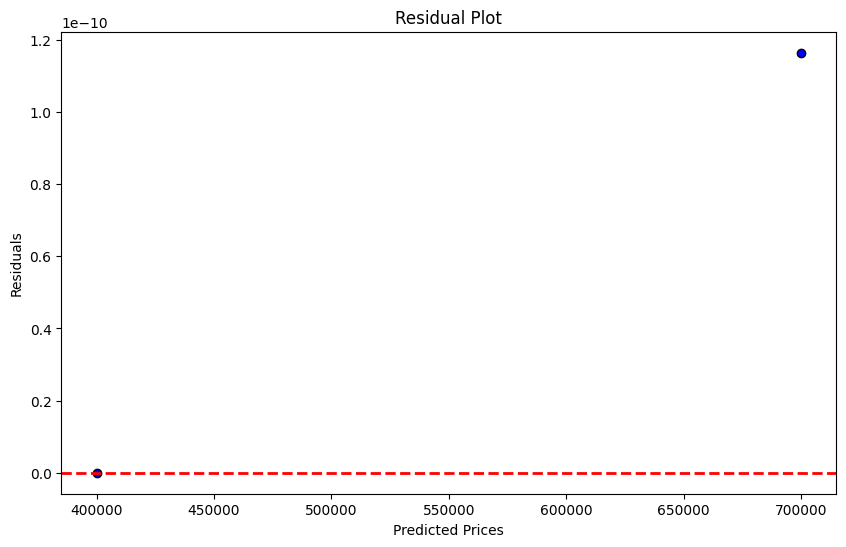

In [9]:
# Plotting the residual plot 
residuals = y_test - y_pred 
plt.figure(figsize=(10, 6)) 
plt.scatter(y_pred, residuals, color='blue', edgecolor='k') 
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) 
plt.xlabel('Predicted Prices') 
plt.ylabel('Residuals') 
plt.title('Residual Plot') 
plt.show()

linear regression model fits the data and whether there are any patterns in the residuals that suggest issues with the model